# Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

# Step 2: Creating Dataset Creation


This Dataset represent e-commerce transactions from an online retail store. It 
includes the following fields: 
1. CustomerID. 
2. OrderID. 
3.  Product. 
4. Quantity. 
5. UnitPrice. 
6. PurchaseDate. 
7. Country.

In [2]:
num_records = 1000  # Adjust size as needed

products = ["Laptop", "Smartphone", "Headphones", "Smartwatch", "Tablet", "Gaming Console", "Keyboard", "Mouse", "Monitor", "Printer"]

start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)

countries = ["USA", "Canada", "UK", "Germany", "France", "Australia", "Japan", "India"]

df = pd.DataFrame({
    "CustomerID": np.random.randint(1000, 2000, num_records),
    "OrderID": np.arange(5000, 5000 + num_records),
    "Product": [random.choice(products) for _ in range(num_records)],
    "Quantity": np.random.randint(1, 11, num_records),
    "UnitPrice": np.random.uniform(5, 500, num_records).round(2),
    "PurchaseDate": [start_date + timedelta(days=random.randint(0, 364)) for _ in range(num_records)], 
    "Country": [random.choice(countries) for _ in range(num_records)]
})

# random: Python's random module used for generating random choices
# np.random.randint: Generates random integers for CustomerID and Quantity
# np.arange: Generates a range of OrderID values
# timedelta: Used to add random days to the start_date for PurchaseDate
# for _ in range: List comprehension to generate random choices for Product and Country
# random.choice: Randomly selects an item from products and countries lists
# random.randint: Generates random integers for days to add to start_date
# np.random.uniform: Generates random float values for UnitPrice
# .round: Rounds the UnitPrice to 2 decimal places
# .head: Displays the first 5 rows of the DataFrame

df.head()


,CustomerID,OrderID,Product,Quantity,UnitPrice,PurchaseDate,Country
0,1991,5000,Monitor,7,422.24,2022-06-07,UK
1,1187,5001,Printer,6,176.31,2022-07-03,France
2,1342,5002,Keyboard,8,375.93,2022-01-22,Germany
3,1935,5003,Laptop,8,212.27,2022-09-29,India
4,1698,5004,Gaming Console,4,117.79,2022-07-28,Japan


# 1. Data Cleaning and Preparation 

In [3]:
# 1. Check for missing values
print(df.isnull().sum())

# if there are missing values
df.fillna({"Product": "Unknown", "Quantity": 1, "UnitPrice":0}, inplace=True)

CustomerID      0
OrderID         0
Product         0
Quantity        0
UnitPrice       0
PurchaseDate    0
Country         0
dtype: int64


In [4]:
# 2. Check for duplicates
print(df.duplicated().sum())

# if there are duplicates
df.drop_duplicates(inplace=True)

0


In [5]:
# Convert PurchaseDate to datetime
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])

In [6]:
# Summary of dataset verification 
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    1000 non-null   int32         
 1   OrderID       1000 non-null   int64         
 2   Product       1000 non-null   object        
 3   Quantity      1000 non-null   int32         
 4   UnitPrice     1000 non-null   float64       
 5   PurchaseDate  1000 non-null   datetime64[ns]
 6   Country       1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 47.0+ KB
None
        CustomerID      OrderID     Quantity    UnitPrice  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1493.306000  5499.500000     5.463000   249.942680   
min    1000.000000  5000.000000     1.000000     5.330000   
25%    1246.000000  5249.750000     3.000000   128.385000   
50%    1494.000000  5499.500000     6.00000

# 2. Filtering Data

In [7]:
# 2.1 Customer and Order Filters: 
# 1. Filter all transactions made by customers from a specific country (e.g., 'USA').
print((df[df["Country"] == "USA"]).head(10))

    CustomerID  OrderID     Product  Quantity  UnitPrice PurchaseDate Country
10        1862     5010    Keyboard         3     450.92   2022-08-08     USA
11        1316     5011       Mouse         9     394.28   2022-12-02     USA
12        1271     5012  Headphones         3     481.26   2022-01-31     USA
27        1261     5027  Headphones         8      35.09   2022-07-30     USA
28        1231     5028     Monitor         6     363.94   2022-03-26     USA
37        1471     5037      Laptop         1     327.51   2022-09-25     USA
48        1397     5048     Printer         3     271.21   2022-04-27     USA
66        1820     5066     Printer         4     284.97   2022-10-20     USA
68        1920     5068      Tablet         5     366.38   2022-02-18     USA
72        1248     5072  Smartwatch         1     339.40   2022-02-02     USA


In [8]:
# 2. Extract orders where the total spend (Quantity * UnitPrice) exceeds $500.
df["Total"] = df["Quantity"] * df["UnitPrice"]
print(df[df["Total"] > 500].head(5))

# Note: This could be done using MySQL right??

   CustomerID  OrderID     Product  Quantity  UnitPrice PurchaseDate  Country  \
0        1991     5000     Monitor         7     422.24   2022-06-07       UK   
1        1187     5001     Printer         6     176.31   2022-07-03   France   
2        1342     5002    Keyboard         8     375.93   2022-01-22  Germany   
3        1935     5003      Laptop         8     212.27   2022-09-29    India   
6        1052     5006  Smartphone         4     479.16   2022-07-07   France   

     Total  
0  2955.68  
1  1057.86  
2  3007.44  
3  1698.16  
6  1916.64  


In [9]:
# 3. Identify customers who purchased more than 3 different products.
customer_count = df.groupby("CustomerID")["Product"].nunique()
print(customer_count[customer_count > 3].head(10))

# nunique(): Return series Number of unique values within each group

CustomerID
1205    5
1342    4
1368    4
1496    4
1663    4
1972    4
Name: Product, dtype: int64


In [10]:
# 2.2 Time-Based Filters: 
# 1. Filter transactions that occurred in July 2022. 
print(df[(df["PurchaseDate"].dt.month == 7) & (df["PurchaseDate"].dt.year == 2022)].head())

    CustomerID  OrderID         Product  Quantity  UnitPrice PurchaseDate  \
1         1187     5001         Printer         6     176.31   2022-07-03   
4         1698     5004  Gaming Console         4     117.79   2022-07-28   
6         1052     5006      Smartphone         4     479.16   2022-07-07   
15        1525     5015         Monitor         8      35.90   2022-07-25   
17        1246     5017        Keyboard         7      51.48   2022-07-16   

      Country    Total  
1      France  1057.86  
4       Japan   471.16  
6      France  1916.64  
15    Germany   287.20  
17  Australia   360.36  


In [11]:
# 2. Extract orders placed during weekends.
print(df[df["PurchaseDate"].dt.dayofweek.isin([5,6])].head())

# isin(): Return a boolean Series showing whether each element in the Series is exactly contained in the passed sequence of values.
# dt.dayofweek: The day of the week with Monday=0, Sunday=6
# dt: Accessor object for datetime like properties of the Series values.

    CustomerID  OrderID   Product  Quantity  UnitPrice PurchaseDate  \
1         1187     5001   Printer         6     176.31   2022-07-03   
2         1342     5002  Keyboard         8     375.93   2022-01-22   
8         1809     5008    Tablet         4      19.44   2022-10-22   
9         1294     5009   Monitor         3     354.23   2022-12-04   
17        1246     5017  Keyboard         7      51.48   2022-07-16   

      Country    Total  
1      France  1057.86  
2     Germany  3007.44  
8       Japan    77.76  
9       Japan  1062.69  
17  Australia   360.36  


In [12]:
# 3. Identify transactions during specific sales events, like Black Friday or Cyber Monday.
black_friday = df[(df["PurchaseDate"].dt.month == 11) & (df["PurchaseDate"].dt.weekday == 4) & 
                        (df["PurchaseDate"].dt.day >= 23) & (df["PurchaseDate"].dt.day <= 29)]
print(black_friday)



     CustomerID  OrderID     Product  Quantity  UnitPrice PurchaseDate  \
424        1904     5424  Smartphone         7     349.66   2022-11-25   
763        1548     5763    Keyboard         1     251.15   2022-11-25   

    Country    Total  
424  Canada  2447.62  
763   India   251.15  


# 3. Sorting Data 

In [13]:
# 1. Sort transactions by: 
# - Total spend in descending order. 
print(df.sort_values("Total", ascending=False).head())


     CustomerID  OrderID         Product  Quantity  UnitPrice PurchaseDate  \
748        1489     5748  Gaming Console        10     498.80   2022-01-31   
857        1766     5857         Printer        10     497.53   2022-01-08   
601        1405     5601           Mouse        10     492.21   2022-12-29   
810        1815     5810          Laptop        10     490.88   2022-10-30   
323        1443     5323      Smartphone        10     485.50   2022-02-20   

       Country   Total  
748  Australia  4988.0  
857     France  4975.3  
601    Germany  4922.1  
810      India  4908.8  
323         UK  4855.0  


In [14]:
# - Purchase date in ascending order. 
print(df.sort_values(by="PurchaseDate", ascending=True).head())

# sort_values(): Sort by the values along either axis.

     CustomerID  OrderID         Product  Quantity  UnitPrice PurchaseDate  \
960        1307     5960        Keyboard         9     150.74   2022-01-01   
621        1205     5621          Laptop         9     302.69   2022-01-01   
941        1038     5941         Monitor         6     357.36   2022-01-01   
277        1693     5277      Smartwatch        10     382.94   2022-01-01   
746        1851     5746  Gaming Console         7      38.71   2022-01-01   

    Country    Total  
960  France  1356.66  
621   India  2724.21  
941  France  2144.16  
277      UK  3829.40  
746  France   270.97  


In [15]:
# - Product name alphabetically. 
print(df.sort_values("Product").head())

     CustomerID  OrderID         Product  Quantity  UnitPrice PurchaseDate  \
184        1084     5184  Gaming Console         4     300.89   2022-07-15   
728        1233     5728  Gaming Console         7     432.22   2022-12-26   
711        1809     5711  Gaming Console         7     381.22   2022-04-04   
166        1000     5166  Gaming Console         2     394.66   2022-10-21   
187        1019     5187  Gaming Console         6     257.79   2022-11-10   

       Country    Total  
184     Canada  1203.56  
728  Australia  3025.54  
711      India  2668.54  
166    Germany   789.32  
187      India  1546.74  


# Will Continue in MySQL #

In [16]:
df.to_csv("ecommerce_data.csv", index=False)

# Going Back to Visualization

In [17]:
data = pd.read_csv('ecommerce_data_from_SQL.csv', delimiter=';')
data

,CustomerID,OrderID,Product,Quantity,UnitPrice,PurchaseDate,Country,TotalSpend
0,1197,5000,Mouse,2,331.04,2022-10-18 00:00:00,India,662.08
1,1599,5001,Smartwatch,7,237.26,2022-11-07 00:00:00,Germany,1660.82
2,1584,5002,Smartphone,5,36.82,2022-02-20 00:00:00,Japan,184.10
3,1779,5003,Monitor,4,13.17,2022-03-19 00:00:00,Japan,52.68
4,1660,5004,Monitor,8,224.16,2022-04-11 00:00:00,France,1793.28
...,...,...,...,...,...,...,...,...
995,1907,5995,Smartwatch,7,215.17,2022-11-28 00:00:00,Japan,1506.19
996,1081,5996,Laptop,2,45.93,2022-05-27 00:00:00,Japan,91.86
997,1903,5997,Laptop,3,300.15,2022-11-08 00:00:00,Japan,900.45
998,1506,5998,Printer,6,268.08,2022-02-14 00:00:00,USA,1608.48


# 6. Visualization(using matplotlib) :Extra grad 

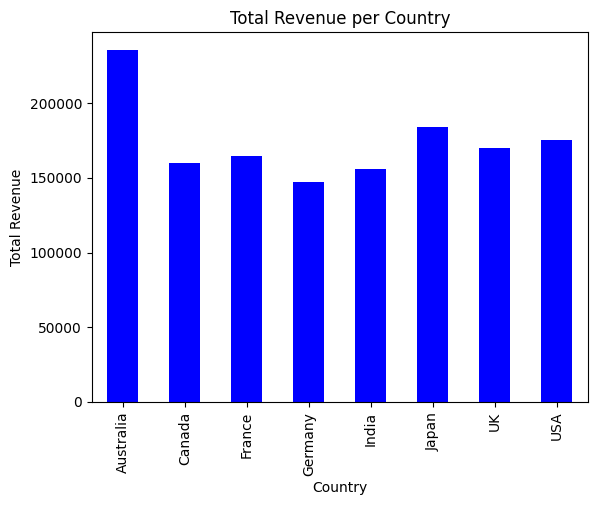

In [18]:
# 1. Plot the total revenue per country using a bar chart.
revenue_country = data.groupby("Country")["TotalSpend"].sum()
# Plot the total revenue per country using a bar chart
revenue_country.plot(kind="bar", color="Blue")

# Add title and labels to the plot
plt.title("Total Revenue per Country")
plt.ylabel("Total Revenue")
plt.xlabel("Country")

# Display the plot
plt.show()


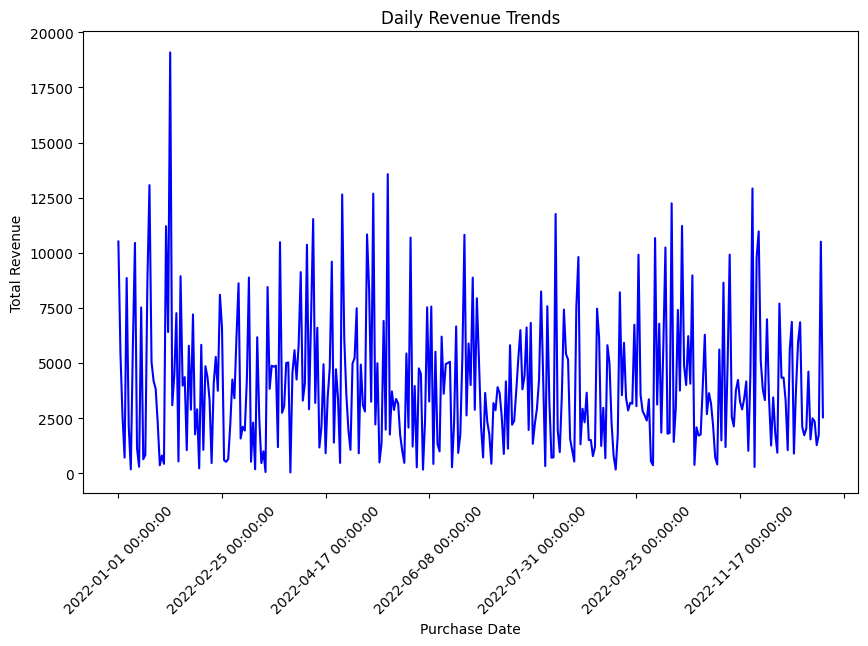

In [19]:
# 2. Visualize daily revenue trends with a line chart.
daily_revenue = data.groupby("PurchaseDate")["TotalSpend"].sum()
plt.figure(figsize=(10, 6))  # Set the figure size
daily_revenue.plot(kind="line", color="blue")
plt.title("Daily Revenue Trends")
plt.ylabel("Total Revenue")
plt.xlabel("Purchase Date")

plt.xticks(rotation=45)

plt.show()



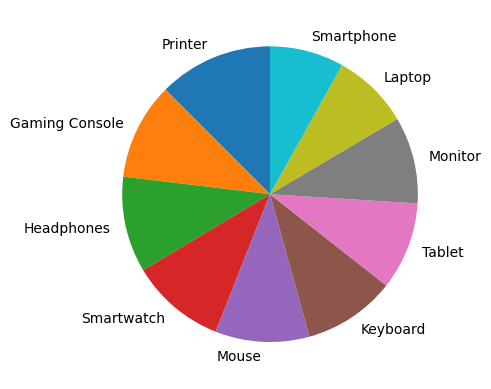

In [20]:
# 3. Use a pie chart to show the distribution of products sold. 
Product_distribution = data["Product"].value_counts()
plt.pie(Product_distribution, labels = Product_distribution.index, startangle = 90)
plt.show() 

In [21]:
df.to_csv("Cleaned_ecommerce_data.csv", index=False)